## 11주차: Computer Vision과 안면인식

### Face(안면인식)의 이해와 실습

face detection : 사진이나 동영상 안에서 사람의 얼굴이 어디 있는지를 확인하는 것

사람의 얼굴을 확인하는 방법 => 눈 코 입 이런 것들의 위치와 좌표를 이용해서 이게 사람인지 아닌지를 구별합니다

face identification : 유명인 100만명 중에서 얼굴을 검색하고 식별 가능

    
similar face search : 얼굴 사진들의 집합과 질의로 새 얼굴이 주어지면 유사도 높은 얼굴을 반환

    
Face grouping : 유사한 얼굴들을 그룹으로 묶어준다.    

### Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. AzurePortal에서 FaceAPI를 먼저 생성하고 접속에 ,..한다.

관련되 라이브러리를 가져온다.   
request는 웹 통신을 위해 가져온다.  
BytesIO, Image는 이미지를 처리하기 위해 

In [36]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

subscription key와 서비스의 주소를 설정한다.

In [37]:
subscription_key = "2bce1a6318144ddb88b63283e1b9785b"   #Azure portal에서 얻어와야 한다.

In [38]:
face_api_url = 'https://kmooc---vision2.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인한다.

In [39]:
image_url = 'https://image.freepik.com/free-photo/_23-2148232001.jpg'

In [40]:
face_image = requests.get(image_url)

In [54]:
img = Image.open(BytesIO(face_image.content))

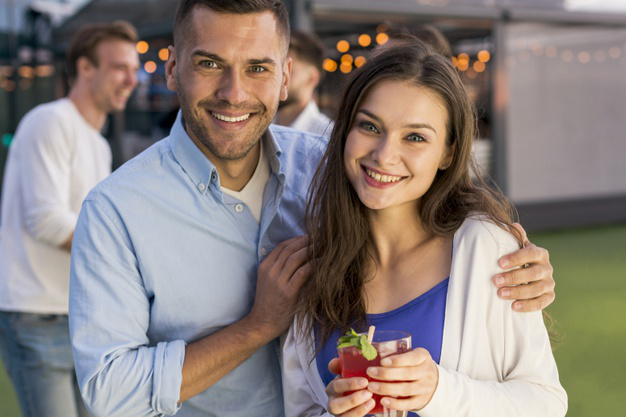

In [55]:
img

헤더 정보를 설정한다.

In [43]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [44]:
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender'
}

In [45]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인한다

In [46]:
# 지금 클라우드에 우리가 관련되어 있는 이미지, URL, subscription_key, 접속에 필요한 URL 요청했다.
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [47]:
faces

[{'faceId': '94801f2d-7477-4c00-8c2d-69a7b700d140',
  'faceRectangle': {'top': 35, 'left': 179, 'width': 107, 'height': 107},
  'faceAttributes': {'gender': 'male', 'age': 31.0}},
 {'faceId': '7c0156a9-04f3-41dc-a71a-d35e89b69fee',
  'faceRectangle': {'top': 104, 'left': 338, 'width': 98, 'height': 98},
  'faceAttributes': {'gender': 'female', 'age': 26.0}}]

In [48]:
for face in faces:
    face_info = face['faceAttributes']
    gender = face_info['gender']
    print(gender)

male
female


In [56]:
def CreatImage(faces):
    for face in faces:
        #Convert width height to a point in a rectangle
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        bottom = left + rect['height']
        right = top + rect['width']

        draw.rectangle(((left, top), (bottom, right)), outline='red')

        #Font location 
        fontX = rect['left']
        fontY = left + rect['height'] - 50

        #Face attributes
        face_info = face['faceAttributes']
        gender = face_info['gender']
        
        age = face_info['age']
        result = "Gender: " + gender + " Age: " + str(age)

        draw.text((fontX, fontY), result, fill='red')

In [57]:
draw = ImageDraw.Draw(img)

In [58]:
CreatImage(faces)

In [59]:
img.show()

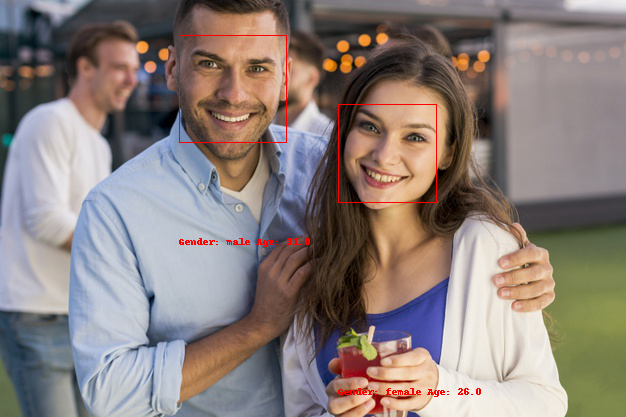

In [60]:
img

In [68]:
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'emotion'
}

In [117]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [118]:
faces

[{'faceId': '1c8798c1-1377-4bf3-9404-d19ceeb62a25',
  'faceRectangle': {'top': 35, 'left': 179, 'width': 107, 'height': 107},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '8e26e006-4083-4806-b591-9e433a33c15b',
  'faceRectangle': {'top': 104, 'left': 338, 'width': 98, 'height': 98},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}}]